Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

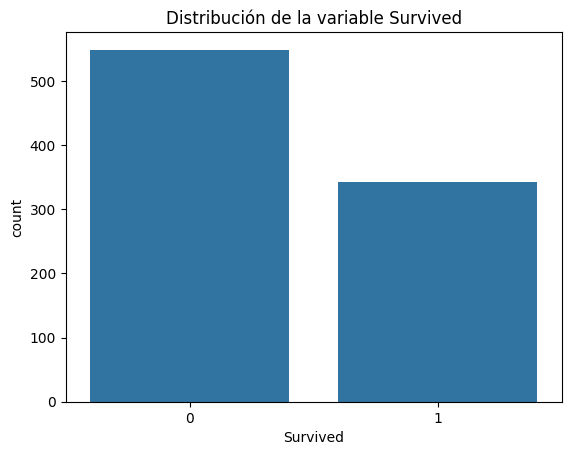

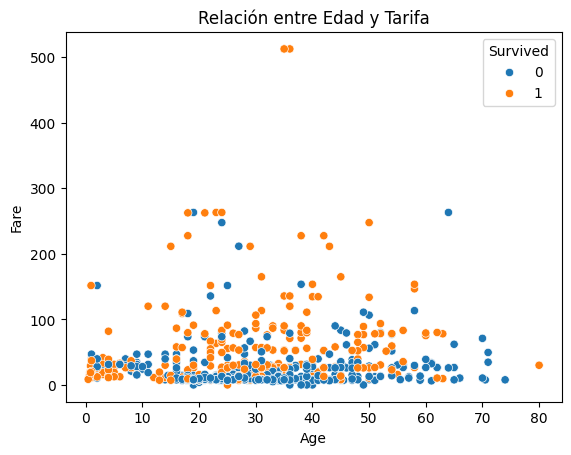

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('./Titanic-Dataset.csv')

# Mostrar las primeras filas
print("Primeras filas del dataset:")
print(df.head())

# Resumen estadístico del dataset
print("\nResumen estadístico:")
print(df.describe())

# Información sobre los tipos de datos y valores nulos
print("\nInformación del dataset:")
print(df.info())

# Visualizar la distribución de la variable objetivo 'Survived'
sns.countplot(data=df, x='Survived')
plt.title('Distribución de la variable Survived')
plt.show()

# Visualizar la relación entre 'Age' y 'Fare'
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Relación entre Edad y Tarifa')
plt.show()



In [11]:
# Imputación de valores faltantes
# Imputar valores nulos en 'Age' con la mediana
df['Age'].fillna(df['Age'].median(), inplace=True)

# Imputar valores nulos en 'Embarked' con la moda
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Codificar variables categóricas 'Sex' y 'Embarked'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Codificar 'male' = 0, 'female' = 1
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})  # Codificar 'S' = 0, 'C' = 1, 'Q' = 2

# Eliminar columnas que no aportan información relevante para el modelo
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Verificar que no haya valores nulos
print("\nDatos después del preprocesamiento:")
print(df.info())



Datos después del preprocesamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB
None


/tmp/ipykernel_9259/4040765245.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_9259/4040765245.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [12]:
from sklearn.feature_selection import SelectKBest, chi2

# Separar las características (X) y la variable objetivo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Seleccionar las 5 mejores características usando la prueba chi-cuadrada
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

# Mostrar las características seleccionadas
selected_columns = X.columns[selector.get_support()]
print("\nCaracterísticas seleccionadas:")
print(selected_columns)



Características seleccionadas:
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')


In [13]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar las dimensiones de los conjuntos
print(f"\nConjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")



Conjunto de entrenamiento: (623, 8)
Conjunto de prueba: (268, 8)


In [14]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de Árbol de Decisión
model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluación con clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Precisión general del modelo
print(f"\nPrecisión del modelo: {accuracy_score(y_test, y_pred)}")



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


Matriz de confusión:
[[137  20]
 [ 30  81]]

Precisión del modelo: 0.8134328358208955


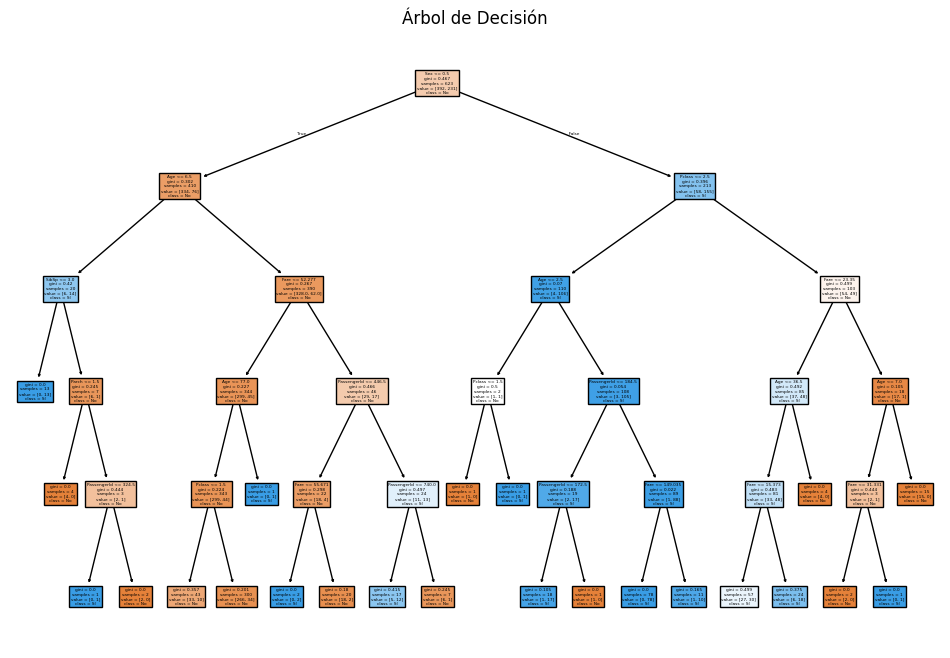

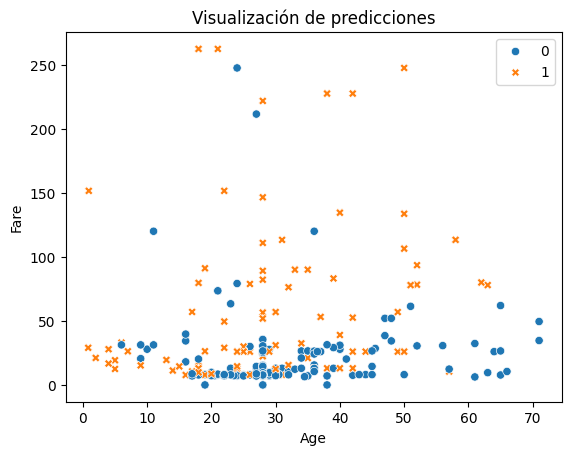

In [16]:
from sklearn import tree

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Sí'])
plt.title('Árbol de Decisión')
plt.show()

# Graficar las predicciones
sns.scatterplot(x=X_test['Age'], y=X_test['Fare'], hue=y_pred, style=y_pred)
plt.title('Visualización de predicciones')
plt.show()
